In [14]:
# Install H2O AutoML
!pip install h2o -q

# Import required libraries
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.model_selection import train_test_split


In [15]:
# Start H2O cluster
h2o.init()

# Load sample dataset
data = pd.read_csv("titanic.csv")

# Preview dataset
data.head()


Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,2 mins 30 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,6 months and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_o5m19w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.168 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Drop unnecessary columns
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Convert categorical to string for H2O
data['Sex'] = data['Sex'].astype(str)
data['Embarked'] = data['Embarked'].astype(str)

# Convert to H2O frame
hf = h2o.H2OFrame(data)

# Split dataset
train, test = hf.split_frame(ratios=[0.8], seed=1234)

# Define features and target
x = [col for col in hf.columns if col != 'Survived']
y = 'Survived'


/tmp/ipython-input-432880688.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-432880688.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


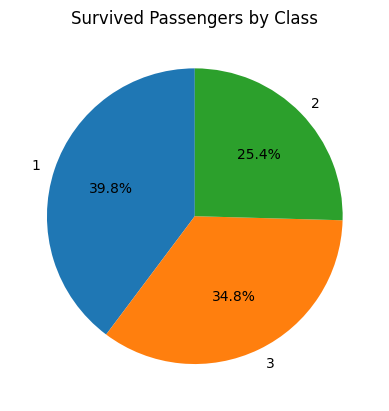

In [19]:
import matplotlib.pyplot as plt

#survival based on survival rate
pclass_survival = data[data['Survived']==1]['Pclass'].value_counts()
plt.pie(pclass_survival, labels=pclass_survival.index, autopct='%1.1f%%', startangle=90)
plt.title('Survived Passengers by Class')
plt.show()


In [20]:
# Initialize AutoML
aml = H2OAutoML(max_models=10, seed=1, balance_classes=True, max_runtime_secs=300)

# Train models
aml.train(x=x, y=y, training_frame=train)

# View leaderboard
lb = aml.leaderboard
lb.head()


AutoML progress: |
07:23:05.501: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
07:23:09.698: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
07:23:10.811: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
07:23:13.237: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
07:23:18.3: _response param, We have de

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_1_AutoML_1_20250929_72305,0.364141,0.132599,0.270909,0.257436,0.132599
StackedEnsemble_AllModels_1_AutoML_1_20250929_72305,0.36453,0.132882,0.268291,0.257658,0.132882
GBM_2_AutoML_1_20250929_72305,0.365669,0.133714,0.268146,0.257636,0.133714
GBM_3_AutoML_1_20250929_72305,0.368831,0.136036,0.267564,0.260369,0.136036
XRT_1_AutoML_1_20250929_72305,0.369778,0.136735,0.295852,0.261067,0.136735
DRF_1_AutoML_1_20250929_72305,0.370861,0.137538,0.268646,0.261993,0.137538
GBM_4_AutoML_1_20250929_72305,0.371441,0.137968,0.27316,0.262309,0.137968
GLM_1_AutoML_1_20250929_72305,0.381319,0.145404,0.295942,0.269801,0.145404
XGBoost_3_AutoML_1_20250929_72305,0.384099,0.147532,0.272031,0.272373,0.147532
XGBoost_1_AutoML_1_20250929_72305,0.386459,0.149351,0.283829,0.277639,0.149351


In [21]:
# Best model
best_model = aml.leader
print(best_model)

# Predict on test set
preds = best_model.predict(test)
preds.head()

# Model performance
perf = best_model.model_performance(test)
print(perf)


Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_1_AutoML_1_20250929_72305


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  5/5
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# DRF base models (used / total)      2/2
# GLM base models (used / total)      1/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.05988575465649931
RMSE: 0.24471566083211616
MAE: 0.17865770184775573
RMSLE: 0.17224503336466226
Mean Residual Deviance: 0.05988575465649931
R^2: 0.7437109112440641
Null degrees of freedom: 711
R

In [22]:
# Save the model to disk
model_path = h2o.save_model(model=best_model, path="models/", force=True)
print("Model saved at:", model_path)


Model saved at: /content/models/StackedEnsemble_BestOfFamily_1_AutoML_1_20250929_72305


In [23]:
# Export predictions
pred_df = preds.as_data_frame()
pred_df.to_csv("predictions.csv", index=False)


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [24]:
# Install dependencies if not already installed
!pip install pyarrow polars

# Export predictions using multi-threaded conversion
pred_df = preds.as_data_frame(use_multi_thread=True)
pred_df.to_csv("predictions.csv", index=False)


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [25]:
# Export predictions using multi-threaded conversion
pred_df = preds.as_data_frame(use_multi_thread=True)
pred_df.to_csv("predictions.csv", index=False)


Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


In [26]:
from google.colab import files

files.download("predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import h2o
import os

# Make sure the folder exists
os.makedirs("models", exist_ok=True)

# Save the best model from AutoML
model_path = h2o.save_model(model=best_model, path="models/", force=True)
print("Model saved at:", model_path)


Model saved at: /content/models/StackedEnsemble_BestOfFamily_1_AutoML_3_20250928_150747


In [27]:
lb_df = aml.leaderboard.as_data_frame()
lb_df.head(10)  # Show top 10 models


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


,model_id,rmse,mse,mae,rmsle,mean_residual_deviance
0,StackedEnsemble_BestOfFamily_1_AutoML_1_202509...,0.364141,0.132599,0.270909,0.257436,0.132599
1,StackedEnsemble_AllModels_1_AutoML_1_20250929_...,0.364530,0.132882,0.268291,0.257658,0.132882
2,GBM_2_AutoML_1_20250929_72305,0.365669,0.133714,0.268146,0.257636,0.133714
3,GBM_3_AutoML_1_20250929_72305,0.368831,0.136036,0.267564,0.260369,0.136036
4,XRT_1_AutoML_1_20250929_72305,0.369778,0.136735,0.295852,0.261067,0.136735
5,DRF_1_AutoML_1_20250929_72305,0.370861,0.137538,0.268646,0.261993,0.137538
6,GBM_4_AutoML_1_20250929_72305,0.371441,0.137968,0.273160,0.262309,0.137968
7,GLM_1_AutoML_1_20250929_72305,0.381319,0.145404,0.295942,0.269801,0.145404
8,XGBoost_3_AutoML_1_20250929_72305,0.384099,0.147532,0.272031,0.272373,0.147532
9,XGBoost_1_AutoML_1_20250929_72305,0.386459,0.149351,0.283829,0.277639,0.149351


In [28]:
top10 = lb_df.head(10)


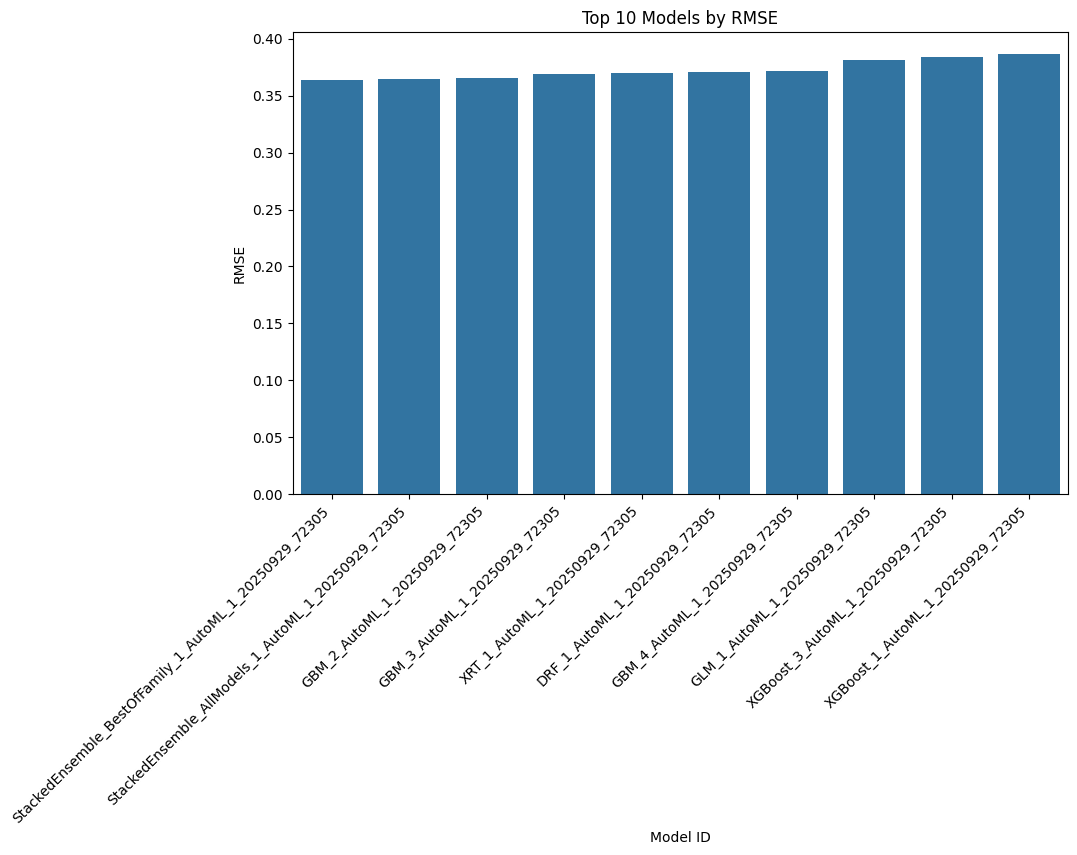

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['auc', 'logloss', 'rmse']  # Choose metrics you want to compare

for metric in metrics:
    if metric in top10.columns:
        plt.figure(figsize=(10,6))
        sns.barplot(x='model_id', y=metric, data=top10)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Top 10 Models by {metric.upper()}')
        plt.ylabel(metric.upper())
        plt.xlabel('Model ID')
        plt.show()


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


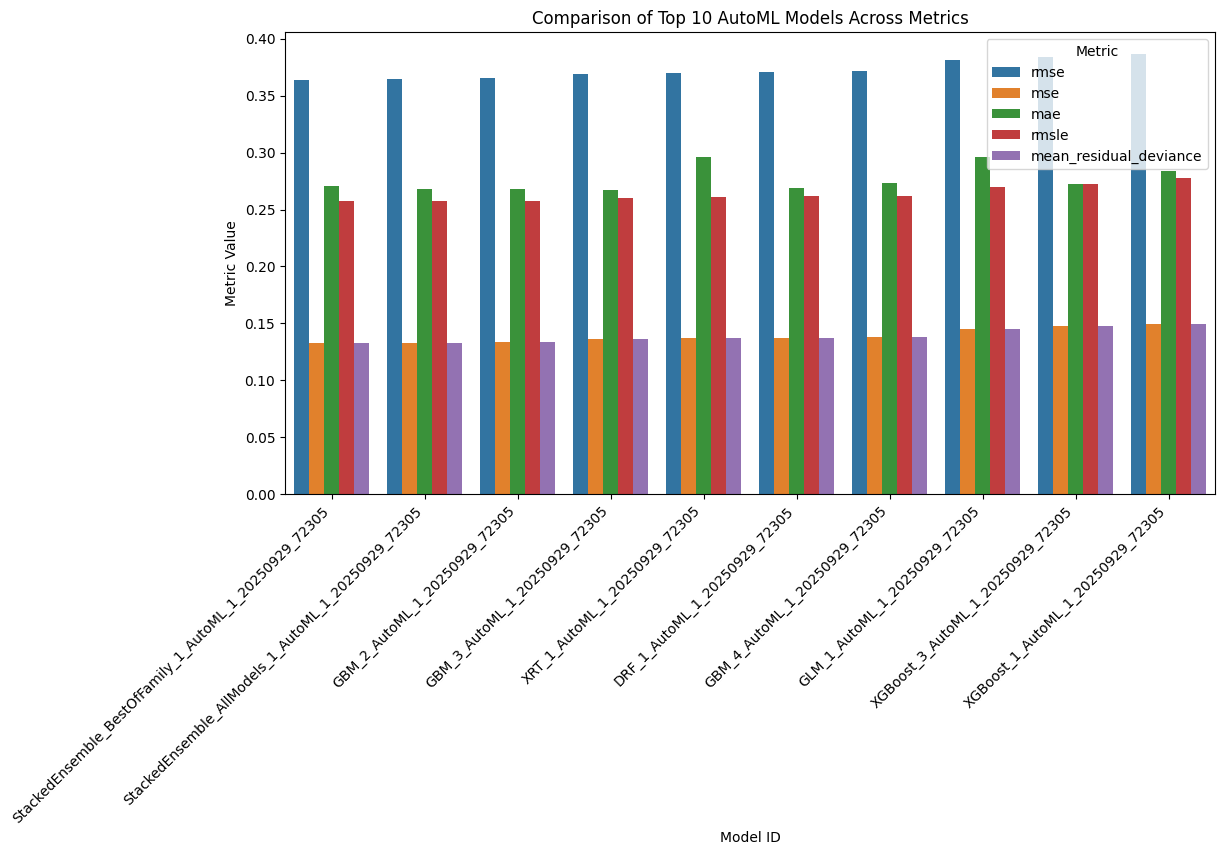

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

lb_df = aml.leaderboard.as_data_frame()
top10 = lb_df.head(10)

# Select only numeric columns for plotting
metrics = [col for col in top10.columns if col not in ['model_id'] and pd.api.types.is_numeric_dtype(top10[col])]

# Melt the DataFrame
plot_df = top10.melt(id_vars='model_id', value_vars=metrics, var_name='Metric', value_name='Value')

plt.figure(figsize=(12,6))
sns.barplot(x='model_id', y='Value', hue='Metric', data=plot_df)
plt.xticks(rotation=45, ha='right')
plt.title('Comparison of Top 10 AutoML Models Across Metrics')
plt.ylabel('Metric Value')
plt.xlabel('Model ID')
plt.legend(title='Metric')
plt.show()


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


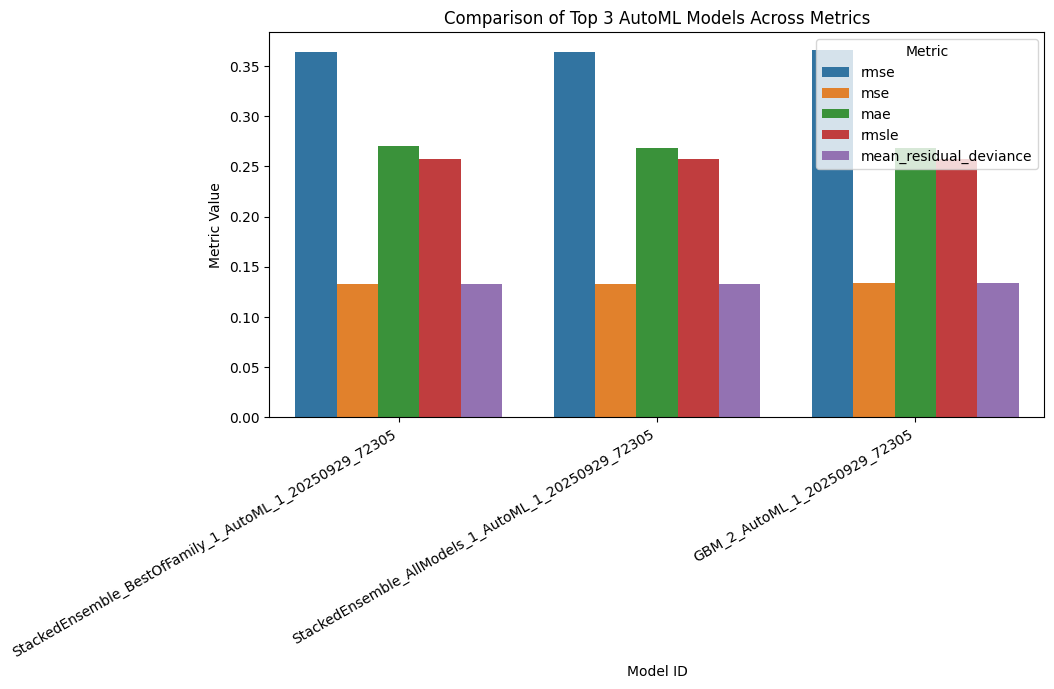

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert leaderboard to pandas
lb_df = aml.leaderboard.as_data_frame()

# Select top 3 models
top3 = lb_df.head(3)

# Identify numeric metrics automatically (exclude 'model_id')
metrics = [col for col in top3.columns if col != 'model_id' and pd.api.types.is_numeric_dtype(top3[col])]

# Melt for seaborn
plot_df = top3.melt(id_vars='model_id', value_vars=metrics, var_name='Metric', value_name='Value')

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x='model_id', y='Value', hue='Metric', data=plot_df)
plt.xticks(rotation=30, ha='right')
plt.title('Comparison of Top 3 AutoML Models Across Metrics')
plt.xlabel('Model ID')
plt.ylabel('Metric Value')
plt.legend(title='Metric')
plt.show()


In [32]:
lb_df = aml.leaderboard.as_data_frame()
print(lb_df.columns)


Index(['model_id', 'rmse', 'mse', 'mae', 'rmsle', 'mean_residual_deviance'], dtype='object')


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


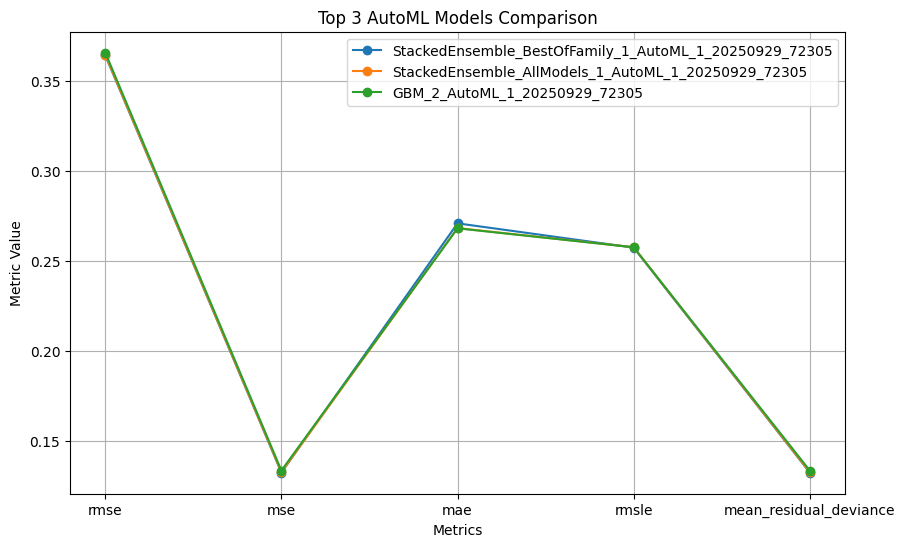

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert leaderboard to pandas
lb_df = aml.leaderboard.as_data_frame()

# Select top 3 models
top3 = lb_df.head(3)

# Choose metrics to plot
metrics = ['rmse', 'mse', 'mae', 'rmsle', 'mean_residual_deviance']

# Plot line chart
plt.figure(figsize=(10,6))
for idx, row in top3.iterrows():
    values = [row[m] for m in metrics]
    plt.plot(metrics, values, marker='o', label=row['model_id'])

plt.title("Top 3 AutoML Models Comparison")
plt.xlabel("Metrics")
plt.ylabel("Metric Value")
plt.legend()
plt.grid(True)
plt.show()


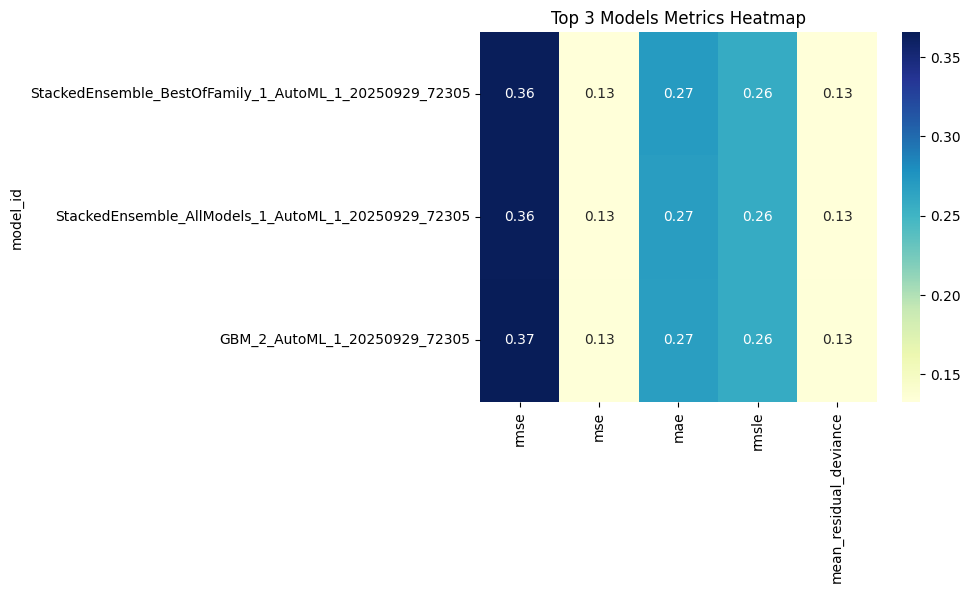

In [34]:
import seaborn as sns

sns.heatmap(top3.set_index('model_id'), annot=True, cmap='YlGnBu')
plt.title('Top 3 Models Metrics Heatmap')
plt.show()


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


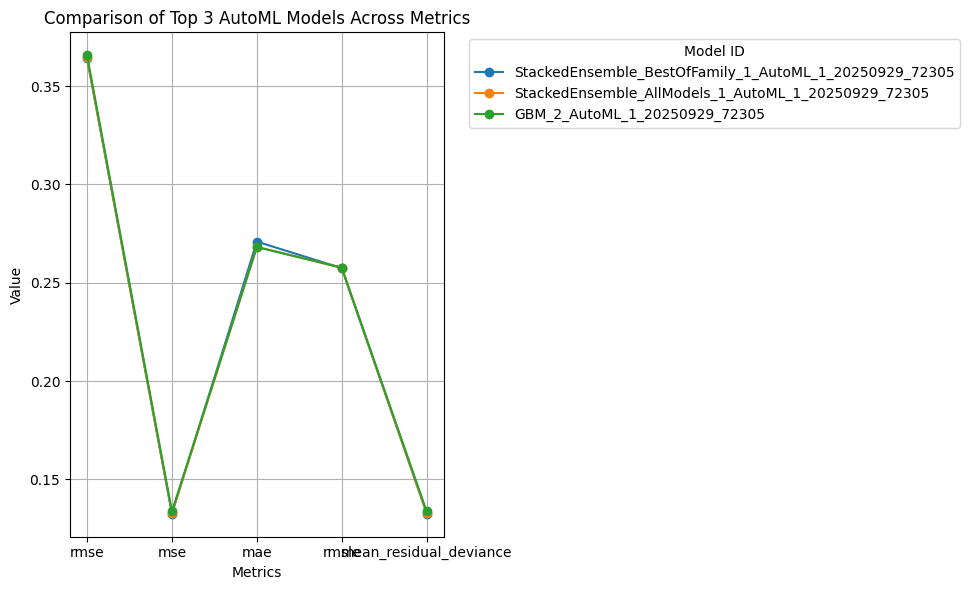

In [35]:
import h2o
import pandas as pd
import matplotlib.pyplot as plt

# Assume H2O cluster is already running and leaderboard is ready
# Convert leaderboard to pandas
lb_df = aml.leaderboard.as_data_frame()

# Select top 3 models
top3 = lb_df.head(3)

# Set model_id as index
top3.set_index('model_id', inplace=True)

# Keep only the metrics
metrics = ['rmse', 'mse', 'mae', 'rmsle', 'mean_residual_deviance']
top3_metrics = top3[metrics]

# Transpose for line plot (metrics on x-axis, values on y-axis)
top3_metrics_T = top3_metrics.T

# Plot line chart
plt.figure(figsize=(10,6))
for model in top3_metrics_T.columns:
    plt.plot(top3_metrics_T.index, top3_metrics_T[model], marker='o', label=model)

plt.title('Comparison of Top 3 AutoML Models Across Metrics')
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.legend(title='Model ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.12/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


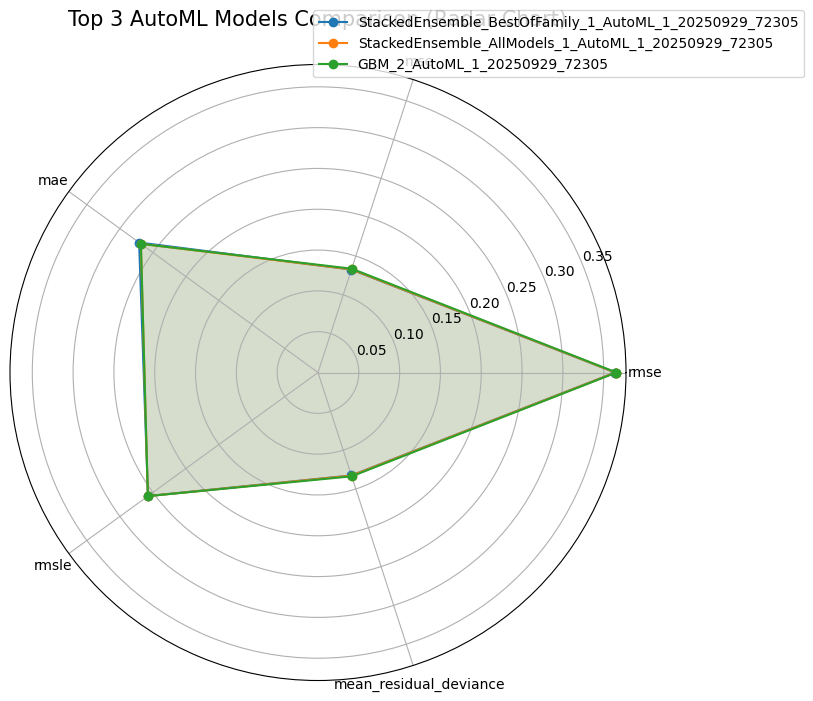

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Convert H2O leaderboard to pandas if not already
lb_df = aml.leaderboard.as_data_frame()

# Select top 3 models
top3 = lb_df.head(3)

# Metrics to compare
metrics = ['rmse', 'mse', 'mae', 'rmsle', 'mean_residual_deviance']

# Number of variables
num_metrics = len(metrics)

# Angle for each metric on radar chart
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Initialize radar plot
fig, ax = plt.subplots(figsize=(8,8), subplot_kw=dict(polar=True))

# Plot each model
for i, row in top3.iterrows():
    values = row[metrics].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, marker='o', label=row['model_id'])
    ax.fill(angles, values, alpha=0.1)  # Optional: fill area for better visualization

# Set metric labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics)

# Add title and legend
plt.title('Top 3 AutoML Models Comparison (Radar Chart)', size=15, y=1.05)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()


In [ ]:
from google.colab import files
files.download("/content/models/StackedEnsemble_BestOfFamily_1_AutoML_2_20250928_95852")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install H2O AutoML
!pip install h2o -q

# Import required libraries
import h2o
from h2o.automl import H2OAutoML
import pandas as pd

# Start H2O cluster
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,5 hours 45 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,6 months
H2O_cluster_name:,H2O_from_python_unknownUser_u7i2vo
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.154 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [37]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load dataset
data = pd.read_csv("titanic.csv")

# Drop unnecessary columns
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
le_sex = LabelEncoder()
le_emb = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['Embarked'] = le_emb.fit_transform(data['Embarked'])

# Ensure all columns are numeric
print("Column types after encoding:")
print(data.dtypes)

# Split features and target
X = data.drop('Survived', axis=1)  # all numeric now
y = data['Survived']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build manual deep learning model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict on test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Optional: create a DataFrame of predictions
pred_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred.flatten()})
print(pred_df.head())


Column types after encoding:
PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object
Epoch 1/50


/tmp/ipython-input-3797576433.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/tmp/ipython-input-3797576433.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5233 - loss: 0.6907 - val_accuracy: 0.8462 - val_loss: 0.5551
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7850 - loss: 0.5475 - val_accuracy: 0.8392 - val_loss: 0.4581
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7961 - loss: 0.4663 - val_accuracy: 0.8392 - val_loss: 0.4153
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7824 - loss: 0.4655 - val_accuracy: 0.8392 - val_loss: 0.3973
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8062 - loss: 0.4427 - val_accuracy: 0.8392 - val_loss: 0.3967
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8253 - loss: 0.4382 - val_accuracy: 0.8392 - val_loss: 0.3933
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7977 - loss: 0.4721 - val_accuracy: 0.8462 - val_loss: 0.3873
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8059 - loss: 0.4270 - val_accuracy: 0.8462 - val_loss: 0.3859
Ep

In [38]:
train, test = hf.split_frame(ratios=[0.8], seed=1234)


In [42]:
# -----------------------------
# 1. Import Libraries
# -----------------------------
import pandas as pd
import h2o
from h2o.automl import H2OAutoML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# -----------------------------
# 2. Load and Preprocess Data
# -----------------------------
data = pd.read_csv("titanic.csv")

# Drop unnecessary columns
data = data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values *** updated to avoid chained assignment warning ***
data = data.copy()
data['Age'] = data['Age'].fillna(data['Age'].median())  # ***
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])  # ***

# Encode categorical variables
le_sex = LabelEncoder()
le_emb = LabelEncoder()
data['Sex'] = le_sex.fit_transform(data['Sex'])
data['Embarked'] = le_emb.fit_transform(data['Embarked'])

# Features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Scale features for manual deep learning
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (same for both models)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# -----------------------------
# 3. Manual Deep Learning Model
# -----------------------------
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # ***
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

dl_history = dl_model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

# Evaluate manual DL
dl_loss, dl_accuracy = dl_model.evaluate(X_test, y_test)
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype(int)

dl_auc = roc_auc_score(y_test, y_pred_dl)
dl_cm = confusion_matrix(y_test, y_pred_dl)

print("\n--- Manual Deep Learning ---")
print("Accuracy:", dl_accuracy)
print("AUC:", dl_auc)
print("Confusion Matrix:\n", dl_cm)

# -----------------------------
# 4. H2O AutoML Model
# -----------------------------
# Start H2O cluster
h2o.init()

# Convert pandas dataframe to H2O frame
hf = h2o.H2OFrame(data)

# *** Convert target to categorical for binary classification ***
hf['Survived'] = hf['Survived'].asfactor()  # ***

# Split dataset
train, test = hf.split_frame(ratios=[0.8], seed=42)

# Features and target
x_h2o = [col for col in hf.columns if col != 'Survived']
y_h2o = 'Survived'

# Initialize and train AutoML
aml = H2OAutoML(max_models=10, seed=42, balance_classes=True, max_runtime_secs=300)
aml.train(x=x_h2o, y=y_h2o, training_frame=train)

# Best model
best_model = aml.leader

# Predict on test set
preds_aml = best_model.predict(test)

# Convert predictions to pandas
preds_df = preds_aml.as_data_frame(use_multi_thread=True)
y_actual = test['Survived'].as_data_frame(use_multi_thread=True)['Survived'].astype(int)  # ***

# Accuracy using predicted class
aml_accuracy = accuracy_score(y_actual, preds_df['predict'].astype(int))  # ***
print("\n--- H2O AutoML ---")
print("Accuracy:", aml_accuracy)

# AUC using probability of class 1
aml_auc = roc_auc_score(y_actual, preds_df['p1'])  # ***
print("AUC:", aml_auc)

# Confusion Matrix
aml_cm = confusion_matrix(y_actual, preds_df['predict'].astype(int))  # ***
print("Confusion Matrix:\n", aml_cm)

# -----------------------------
# 5. Comparison Summary
# -----------------------------
comparison = pd.DataFrame({
    'Model': ['Manual DL', 'H2O AutoML'],
    'Accuracy': [dl_accuracy, aml_accuracy],
    'AUC': [dl_auc, aml_auc]
})

print("\n--- Side by Side Comparison ---")
print(comparison)


Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6601 - loss: 0.6568 - val_accuracy: 0.7902 - val_loss: 0.5530
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7461 - loss: 0.5699 - val_accuracy: 0.8462 - val_loss: 0.4616
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7717 - loss: 0.5144 - val_accuracy: 0.8392 - val_loss: 0.4118
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8005 - loss: 0.4793 - val_accuracy: 0.8182 - val_loss: 0.3984
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7876 - loss: 0.4813 - val_accuracy: 0.8252 - val_loss: 0.3889
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7978 - loss: 0.4346 - val_accuracy: 0.8322 - val_loss: 0.3839
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8289 - loss: 0.4330 - val_accuracy: 0.8322 - val_loss: 0.3896
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8360 - loss: 0.4082 - val_accuracy: 0.8392 - val_loss: 0.3841

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

--- Manual Deep Learning ---
Accuracy: 0.8100558519363403
AUC: 0.7962033462033462
Confusion Matrix:
 [[92 13]
 [21 53]]
Checking whether there is an H2O instance running at http://localhost:54321. connected.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,9 mins 08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,6 months and 1 day
H2O_cluster_name:,H2O_from_python_unknownUser_o5m19w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.159 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%
Export File progress: |██████████████████████████████████████████████████████████| (done) 100%

--- H2O AutoML ---
Accuracy: 0.8342245989304813
AUC: 0.8716216216216216
Confusion Matrix:
 [[94 17]
 [14 62]]

--- Side by Side Comparison ---
        Model  Accuracy       AUC
0   Manual DL  0.810056  0.796203
1  H2O AutoML  0.834225  0.871622


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# -----------------------------
# 1. ROC for Manual Deep Learning
# -----------------------------
y_pred_dl_prob = dl_model.predict(X_test).ravel()  # predicted probabilities
fpr_dl, tpr_dl, _ = roc_curve(y_test, y_pred_dl_prob)
auc_dl = auc(fpr_dl, tpr_dl)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [44]:
# -----------------------------
# 2. ROC for H2O AutoML
# -----------------------------
y_pred_aml_prob = preds_df['p1']  # probability of class 1
fpr_aml, tpr_aml, _ = roc_curve(y_actual, y_pred_aml_prob)
auc_aml = auc(fpr_aml, tpr_aml)

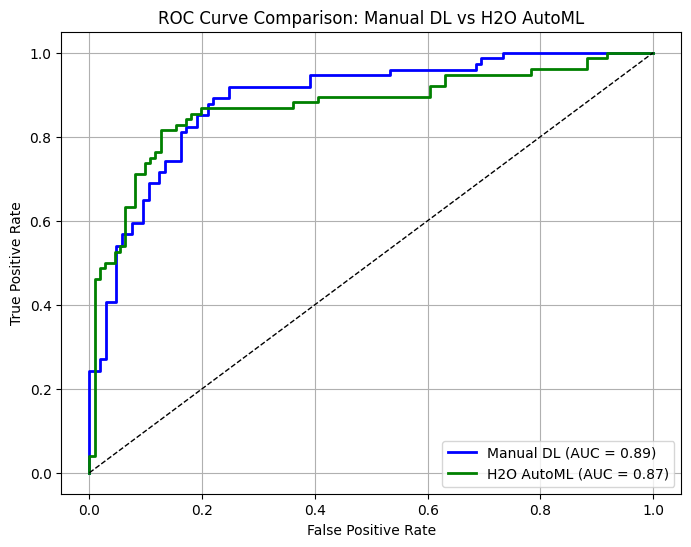

In [45]:
# -----------------------------
# 3. Plotting
# -----------------------------
plt.figure(figsize=(8,6))
plt.plot(fpr_dl, tpr_dl, label=f'Manual DL (AUC = {auc_dl:.2f})', color='blue', linewidth=2)
plt.plot(fpr_aml, tpr_aml, label=f'H2O AutoML (AUC = {auc_aml:.2f})', color='green', linewidth=2)
plt.plot([0,1], [0,1], 'k--', linewidth=1)  # random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Manual DL vs H2O AutoML')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [46]:
from sklearn.metrics import f1_score

# --- Manual Deep Learning F1-score ---
f1_dl = f1_score(y_test, y_pred_dl)
print("Manual DL F1-score:", f1_dl)

# --- H2O AutoML F1-score ---
f1_aml = f1_score(y_actual, preds_df['predict'].astype(int))
print("H2O AutoML F1-score:", f1_aml)


Manual DL F1-score: 0.7571428571428571
H2O AutoML F1-score: 0.8


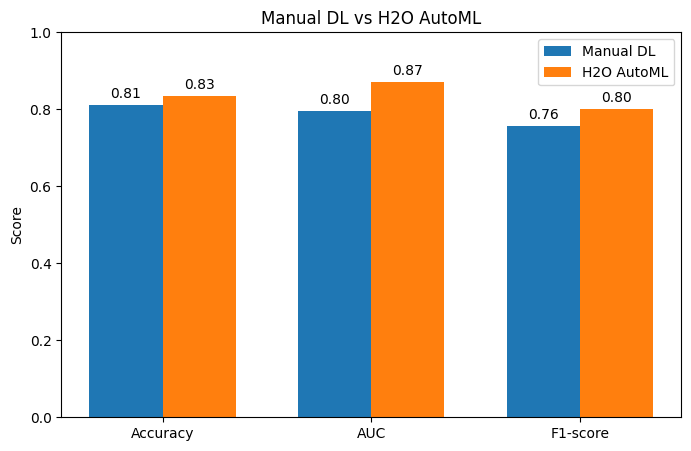

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'AUC', 'F1-score']
manual_values = [dl_accuracy, dl_auc, f1_dl]
automl_values = [aml_accuracy, aml_auc, f1_aml]

x = np.arange(len(metrics))
width = 0.35

# Plot
fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, manual_values, width, label='Manual DL')
rects2 = ax.bar(x + width/2, automl_values, width, label='H2O AutoML')

ax.set_ylabel('Score')
ax.set_title('Manual DL vs H2O AutoML')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.set_ylim(0, 1)
ax.legend()

# Annotate bars
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()
